**Метод наименьших квадратов**

В этом задании вам необходимо реализовать алгоритм МНК (метод наименьших квадратов) в виде функции с использованием библиотеки numpy:

```
def mnk(x_,y_):
    …
    return a,b
```
Входные данные:

●     x_: временной ряд x длиной 30 точек, сгенерированный с помощью функции linspace;

●     y_: временной ряд y длиной 30 точек, сгенерированный с помощью функции linspace с коэффициентами a и b.


Написанная функция должна возвращать коэффициенты a и b функции линейной аппроксимации (y = ax + b).

In [11]:
import numpy as np

def mnk(x_,y_):
    # запишите далее ваш код
    A = np.vstack([x_, np.ones(len(x_))]).T
    # print(A)
    a, b = np.linalg.lstsq(A, y_, rcond=None)[0]

    return a, b

In [14]:
x = np.array([1, 2, 3, 4, 5])
y = np.array([2, 4, 5, 4, 5])

a, b = mnk(x, y)

[[1. 1.]
 [2. 1.]
 [3. 1.]
 [4. 1.]
 [5. 1.]]


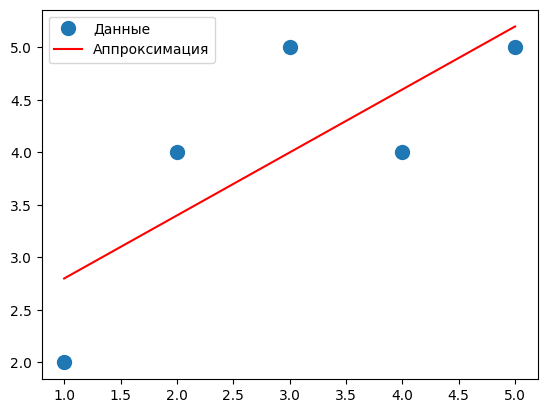

In [6]:
import matplotlib.pyplot as plt

plt.plot(x, y, 'o', label='Данные', markersize=10)
plt.plot(x, a * x + b, 'r', label='Аппроксимация')
plt.legend()
plt.show()

**Анализ информации о клиентах**

Вам предложены данные о клиентах, которые хранятся в следующем формате:
(picture)
Выполните следующие задания применительно к данным:

- Удалите строки, где есть пропуски.
- Удалите дубликаты, если они имеются в данных.
- Замените нулевые значения средними по столбцу без учета строки нулевого значения.
- Сохраните результаты проделанных действий в датафрейм с именем df

In [15]:
import pandas as pd
df = pd.read_csv('users.csv', sep=',')

# далее запишите ваш код
# Удалите строки, где есть пропуски.
df = df.dropna()

# Удалите дубликаты, если они имеются в данных.
df = df.drop_duplicates()

# Замените нулевые значения средними по столбцу без учета строки нулевого значения.
for col in df.columns:
    if col == "age":
        mask = df[col] != 0  # Создаем маску, исключая нулевые значения
        col_mean = df.loc[mask, col].mean()  # Вычисляем среднее значение без учета нулевых значений
        df[col] = df[col].mask(df[col] == 0, col_mean)  # Заменяем нулевые значения средними


FileNotFoundError: ignored

**Анализ электромобилей — 1**

Вам предложены данные об электромобилях, которые хранятся в файле [Electric_Car.csv](https://lms.mipt.ru/pluginfile.php/159922/question/questiontext/342382/3/37373161/Electric_Car.csv).

Выполните следующие действия применительно к данным:

Сагрегируйте данные по брендам (поле Brand).
Вычислите среднее значение цены (поле PriceEuro) для каждой группы.
Сохраните результаты проделанных действий в датафрейм с именем Carsgroupby.

In [16]:
import pandas as pd

Cars = pd.read_csv('/Electric_Car.csv')

In [17]:
Cars.head()

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,Yes,AWD,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0,160,270,167,250,Yes,RWD,Type 2 CCS,Hatchback,C,5,30000
2,Polestar,2,4.7,210,400,181,620,Yes,AWD,Type 2 CCS,Liftback,D,5,56440
3,BMW,iX3,6.8,180,360,206,560,Yes,RWD,Type 2 CCS,SUV,D,5,68040
4,Honda,e,9.5,145,170,168,190,Yes,RWD,Type 2 CCS,Hatchback,B,4,32997


In [40]:
Carsgroupby = Cars.groupby('Brand')['PriceEuro'].mean().reset_index()

In [41]:
print(Carsgroupby['PriceEuro'].sum())

1706238.541025641


**Анализ электромобилей — 2**

Вам предложены данные об электромобилях, которые хранятся в файле [Electric_Car.csv](https://lms.mipt.ru/pluginfile.php/159922/question/questiontext/342382/3/37373161/Electric_Car.csv).

Выполните следующие действия применительно к данным:

Сделайте срез по столбцу PriceEuro со значениями более 50000 и по столбцу TopSpeed_KmH со значениями более 200.
Переназначьте индексы таблицы начиная с нуля.
Сохраните результаты проделанных действий в датафрейм с именем Cars_speed.

In [50]:
Cars_speed = Cars.loc[(Cars.PriceEuro > 50000) & (Cars.TopSpeed_KmH > 200) ].reset_index()

print(np.sum(Cars_speed.PriceEuro)+np.sum(Cars_speed.TopSpeed_KmH)   == np.sum(Cars_speed_prove.PriceEuro)+np.sum(Cars_speed_prove.TopSpeed_KmH))

True


**Анализ электромобилей — 3**

Вам предложены данные, которые хранятся в датафреймах [EC.csv](https://lms.mipt.ru/pluginfile.php/159922/question/questiontext/342382/5/37373163/EC.csv), [EVP.csv](https://lms.mipt.ru/pluginfile.php/159922/question/questiontext/342382/5/37373163/EVP.csv).

Вам необходимо:

1.	Выполнить операцию слияния таблиц по столбцу Brand и сохранить результат в переменную integral.
2.	Получить описательные статистики для полученной таблицы integral с помощью функции describe().
3.	Сохранить результат вывода описательных статистик в переменную describe_pd.

In [51]:
import pandas as pd
import numpy as np
EC = pd.read_csv('/EC.csv', sep=',')
EVP = pd.read_csv('/EVP.csv', sep=',')

# далее запишите ваш код

In [52]:
integral = pd.merge(EC, EVP, on='Brand', how='outer')

In [55]:
describe_pd = integral.describe()